In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding,Flatten, Dense
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [ ]:
# La couche Embedding prend au moins deux arguments :
# le nombre de tokens possibles, ici 1000 (1 + indice maximum des mots),
# et la dimensionnalité des embeddings, ici 64.
couche_embedding = Embedding(1000, 64)

# Afficher la couche pour vérifier la configuration
print(couche_embedding)

<Embedding name=embedding, built=False>


In [ ]:
# Nombre de mots à considérer comme caractéristiques
max_features = 10000
# Couper les textes après ce nombre de mots
# (parmi les max_features mots les plus courants)
maxlen = 20

# Charger les données sous forme de listes d'entiers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Transformer les listes d'entiers
# en un tenseur 2D d'entiers de forme `(échantillons, maxlen)`
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Afficher les formes des tenseurs pour vérifier la configuration
print('Forme du tenseur x_train:', x_train.shape)
print('Forme du tenseur x_test:', x_test.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Forme du tenseur x_train: (25000, 20)
Forme du tenseur x_test: (25000, 20)


In [ ]:
# Inverser l'index des mots pour obtenir un mapping de l'entier vers le mot
word_index = imdb.get_word_index()

# Inverser l'index des mots pour obtenir un mapping de l'entier vers le mot
reverse_word_index = {value: key for key, value in word_index.items()}

# Fonction pour décoder une séquence en texte
def decode_review(sequence):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in sequence])

# Afficher le texte et le label d'une ligne spécifique
index = 0  # index de la ligne à afficher
print("Texte :", decode_review(x_train[index]))
print("Label :", y_train[index])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Texte : story was so lovely because it was true and was someone's life after all that was shared with us all
Label : 1


In [ ]:
# Définir le modèle séquentiel
model = Sequential()

# Nous spécifions la longueur maximale de l'entrée pour notre couche Embedding
# afin de pouvoir aplatir les entrées encodées plus tard
model.add(Embedding(10000, 8, input_length=maxlen))
# Après la couche Embedding,
# nos activations ont la forme `(échantillons, maxlen, 8)`.

# Nous aplatissons le tenseur 3D des embeddings
# en un tenseur 2D de forme `(échantillons, maxlen * 8)`
model.add(Flatten())

# Nous ajoutons le classificateur au-dessus
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Résumé du modèle
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5721 - loss: 0.6836 - val_accuracy: 0.6986 - val_loss: 0.6069
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7462 - loss: 0.5582 - val_accuracy: 0.7298 - val_loss: 0.5233
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7852 - loss: 0.4641 - val_accuracy: 0.7470 - val_loss: 0.5024
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8089 - loss: 0.4251 - val_accuracy: 0.7544 - val_loss: 0.4961
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8241 - loss: 0.3956 - val_accuracy: 0.7542 - val_loss: 0.4954
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8317 - loss: 0.3777 - val_accuracy: 0.7538 - val_loss: 0.4986
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8475 - loss: 0.3532 - val_accuracy: 0.7574 - val_loss: 0.5034
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8569 - loss: 0.3405 - val_accuracy: 0.

In [ ]:
# Évaluer le modèle
score = model.evaluate(x_test, y_test, batch_size=32)
print(f'Loss: {score[0]} / Accuracy: {score[1]}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7525 - loss: 0.5221
Loss: 0.5159890055656433 / Accuracy: 0.7556399703025818


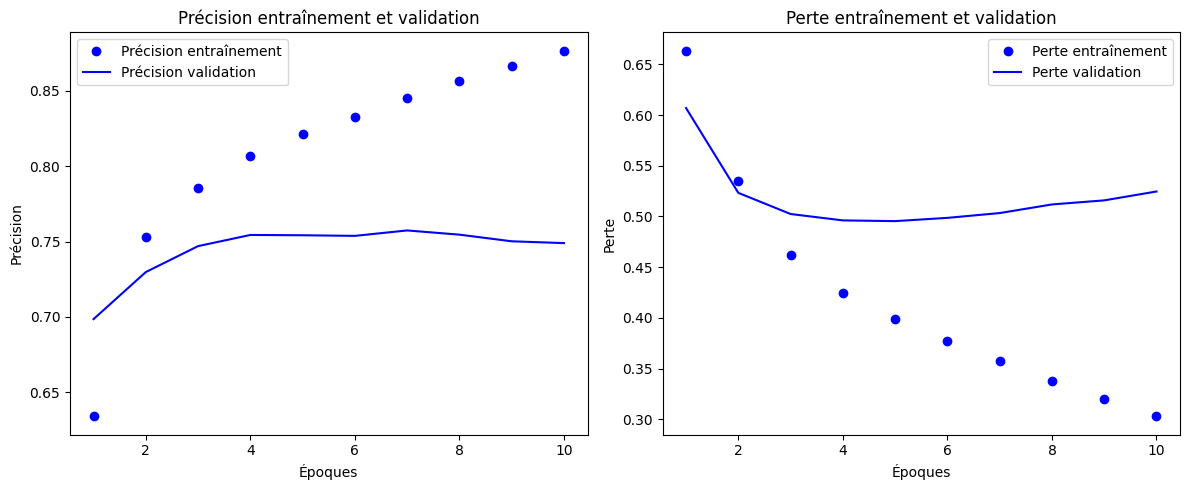

In [ ]:
import matplotlib.pyplot as plt

# Tracer les courbes de validation et d'entraînement
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Précision entraînement')
plt.plot(epochs, val_acc, 'b', label='Précision validation')
plt.title('Précision entraînement et validation')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Perte entraînement')
plt.plot(epochs, val_loss, 'b', label='Perte validation')
plt.title('Perte entraînement et validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 91.2 MB/s eta 0:00:00


In [ ]:
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

# Exemple de corpus de texte
sentences = [
    ['je', 'veux', 'apprendre', 'le', 'deep', 'learning'],
    ['le', 'deep', 'learning', 'est', 'fascinant'],
    ['je', 'suis', 'passionné', 'par', 'le', 'deep', 'learning'],
    ['apprendre', 'le', 'machine', 'learning', 'est', 'utile'],
    ['le', 'machine', 'learning', 'est', 'une', 'technologie', 'clé'],
    ['la', 'technologie', 'transforme', 'le', 'monde']
]


In [ ]:
# Entraînement du modèle Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)

# Affichage des vecteurs pour un mot spécifique
word = 'learning'
print(f"Vecteur pour '{word}':\n", model.wv[word])

Vecteur pour 'learning':
 [-8.6196875e-03  3.6657380e-03  5.1898835e-03  5.7419385e-03
  7.4669183e-03 -6.1676754e-03  1.1056137e-03  6.0472824e-03
 -2.8400505e-03 -6.1735227e-03 -4.1022300e-04 -8.3689485e-03
 -5.6000124e-03  7.1045388e-03  3.3525396e-03  7.2256695e-03
  6.8002474e-03  7.5307419e-03 -3.7891543e-03 -5.6180597e-04
  2.3483764e-03 -4.5190323e-03  8.3887316e-03 -9.8581640e-03
  6.7646410e-03  2.9144168e-03 -4.9328315e-03  4.3981876e-03
 -1.7395747e-03  6.7113843e-03  9.9648498e-03 -4.3624435e-03
 -5.9933780e-04 -5.6956373e-03  3.8508223e-03  2.7866268e-03
  6.8910765e-03  6.1010956e-03  9.5384968e-03  9.2734173e-03
  7.8980681e-03 -6.9895042e-03 -9.1558648e-03 -3.5575271e-04
 -3.0998408e-03  7.8943167e-03  5.9385742e-03 -1.5456629e-03
  1.5109634e-03  1.7900408e-03  7.8175711e-03 -9.5101865e-03
 -2.0553112e-04  3.4691966e-03 -9.3897223e-04  8.3817719e-03
  9.0107834e-03  6.5365066e-03 -7.1162102e-04  7.7104042e-03
 -8.5343346e-03  3.2071066e-03 -4.6379971e-03 -5.0889552e-0

In [ ]:
# Entraînement du modèle Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)

# Affichage des vecteurs pour un mot spécifique
word = 'apprendre'
print(f"Vecteur pour '{word}':\n", model.wv[word])


Vecteur pour 'apprendre':
 [ 8.1312163e-03 -4.4548069e-03 -1.0670295e-03  1.0063692e-03
 -1.9004161e-04  1.1490881e-03  6.1164075e-03 -2.1671187e-05
 -3.2485053e-03 -1.5101139e-03  5.8997073e-03  1.5131448e-03
 -7.1896776e-04  9.3308007e-03 -4.9177408e-03 -8.3895726e-04
  9.1746878e-03  6.7489478e-03  1.5029282e-03 -8.8835526e-03
  1.1466364e-03 -2.2884302e-03  9.3718776e-03  1.2074151e-03
  1.4885989e-03  2.4067829e-03 -1.8369519e-03 -5.0016348e-03
  2.3434409e-04 -2.0155816e-03  6.6028652e-03  8.9396480e-03
 -6.7302148e-04  2.9823196e-03 -6.1065839e-03  1.7008499e-03
 -6.9277580e-03 -8.6921519e-03 -5.8998177e-03 -8.9577101e-03
  7.2783264e-03 -5.7714740e-03  8.2760993e-03 -7.2426526e-03
  3.4202491e-03  9.6733402e-03 -7.7840928e-03 -9.9449763e-03
 -4.3332363e-03 -2.6859734e-03 -2.7057697e-04 -8.8314675e-03
 -8.6178575e-03  2.7984679e-03 -8.2061635e-03 -9.0711359e-03
 -2.3419496e-03 -8.6313859e-03 -7.0529347e-03 -8.4047075e-03
 -3.0502779e-04 -4.5678271e-03  6.6306619e-03  1.5269102e-